In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import itertools
import urllib
import csv


In [2]:
def alltours_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): 
    "Choose the tour with the minimum tour length."
    return min(tours, key=tour_length)

# TO DO: Data types: cities, tours, Functions: alltours, tour_length

In [3]:
alltours = itertools.permutations 

In [4]:
cities = {1, 2, 3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [5]:
def tour_length(tour):
    "The total of distances between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

# TO DO: Functions: distance, Data types: cities

In [6]:
# Cities are represented as Points, which are represented as complex numbers
Point = complex
City  = Point

def X(point): 
    "The x coordinate of a point."
    return point.real

def Y(point): 
    "The y coordinate of a point."
    return point.imag

def distance(A, B): 
    "The distance between two points."
    return abs(A - B)

In [7]:
A = City(3, 0)
B = City(0, 4)
distance(A, B)

5.0

In [8]:
{City(random.randrange(1000), random.randrange(1000)) for c in range(6)}

{(12+395j), (217+251j), (417+323j), (741+790j), (935+223j), (976+870j)}

In [9]:
def Cities(n, width=900, height=600, seed=42):
    "Make a set of n cities, each with random coordinates within a (width x height) rectangle."
    random.seed(seed * n)
    return frozenset(City(random.randrange(width), random.randrange(height))
                     for c in range(n))

In [10]:
# A set of 5 cities
Cities(5)

frozenset({(172+20j), (234+40j), (393+7j), (671+296j), (696+415j)})

In [11]:
# The same set of 5 cities each time
[Cities(5) for i in range(3)]

[frozenset({(172+20j), (234+40j), (393+7j), (671+296j), (696+415j)}),
 frozenset({(172+20j), (234+40j), (393+7j), (671+296j), (696+415j)}),
 frozenset({(172+20j), (234+40j), (393+7j), (671+296j), (696+415j)})]

In [12]:
# A different set of 5 cities each time
[Cities(5, seed=i) for i in range(3)]

[frozenset({(41+265j), (414+310j), (523+497j), (776+430j), (864+394j)}),
 frozenset({(29+476j), (637+261j), (759+367j), (794+255j), (814+542j)}),
 frozenset({(211+473j), (439+494j), (585+33j), (591+15j), (832+503j)})]

In [24]:
alltours_tsp(Cities(8))

((6+546j),
 (199+147j),
 (350+65j),
 (737+26j),
 (847+187j),
 (891+465j),
 (554+374j),
 (505+548j))

In [14]:
tour_length(alltours_tsp(Cities(8)))

2509.307587720301

In [19]:
def plot_tour(tour): 
    "Plot the cities as circles and the tour as lines between them."
    plot_lines(list(tour) + [tour[0]])
    
def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    plt.plot(map(X, points), map(Y, points), style)
    plt.axis('scaled'); plt.axis('off')


RuntimeError: matplotlib does not support generators as input

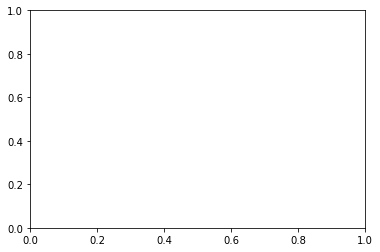

In [27]:
plot_tour(alltours_tsp(Cities(8)))

In [ ]:
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    t0 = time.clock()
    tour = algorithm(cities)
    t1 = time.clock()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)

In [18]:
plot_tsp(alltours_tsp, Cities(8))

TypeError: plot_tour() takes 1 positional argument but 2 were given